In [108]:
# ================================================
# 🛍️ CUSTOMER SPENDING BEHAVIOR ANALYSIS PROJECT
# Author: MITHIL
# ================================================

## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import requests
import holidays

plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

### Loading the dataset

In [3]:

df = pd.read_csv('data-2.csv',encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Basic Info

In [143]:
df.shape

(541909, 8)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [145]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


### Data Cleaning

In [8]:
# Rename columns for simplicity
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

In [148]:
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [12]:
# Drop rows with missing Customer ID (common in e-commerce datasets)
df = df.dropna(subset=['customerid'])

In [15]:
# Remove negative quantities or unit prices
df = df[(df['quantity'] > 0) & (df['unitprice'] > 0)]
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [17]:
# Add Revenue column
df['revenue'] = df['quantity'] * df['unitprice']
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [19]:
# Convert date 
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

# Extract time features
df['invoice_month'] = df['invoicedate'].dt.to_period('M')
df['invoice_weekday'] = df['invoicedate'].dt.day_name()
df['invoice_hour'] = df['invoicedate'].dt.hour


df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,invoice_month,invoice_weekday,invoice_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12,Friday,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12,Friday,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,Friday,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,Friday,12


### Exploratory Analysis : KPIs

In [22]:
total_revenue = df['revenue'].sum()
unique_customers = df['customerid'].nunique()
avg_order_value = df.groupby('invoiceno')['revenue'].sum().mean()

print(f"💰 Total Revenue: {total_revenue:,.2f}")
print(f"👥 Unique Customers: {unique_customers}")
print(f"📦 Avg Order Value: {avg_order_value:,.2f}")

💰 Total Revenue: 8,911,407.90
👥 Unique Customers: 4338
📦 Avg Order Value: 480.87


###  Revenue Trend Over Time

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


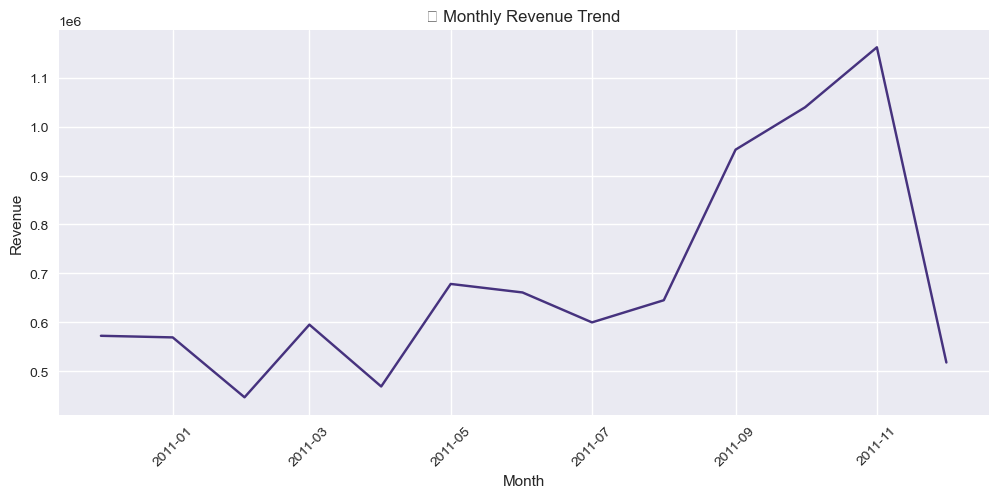

In [25]:
monthly_revenue = df.groupby('invoice_month')['revenue'].sum().reset_index()
monthly_revenue['invoice_month'] = monthly_revenue['invoice_month'].dt.to_timestamp()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_revenue, x='invoice_month', y='revenue')
plt.title("📈 Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

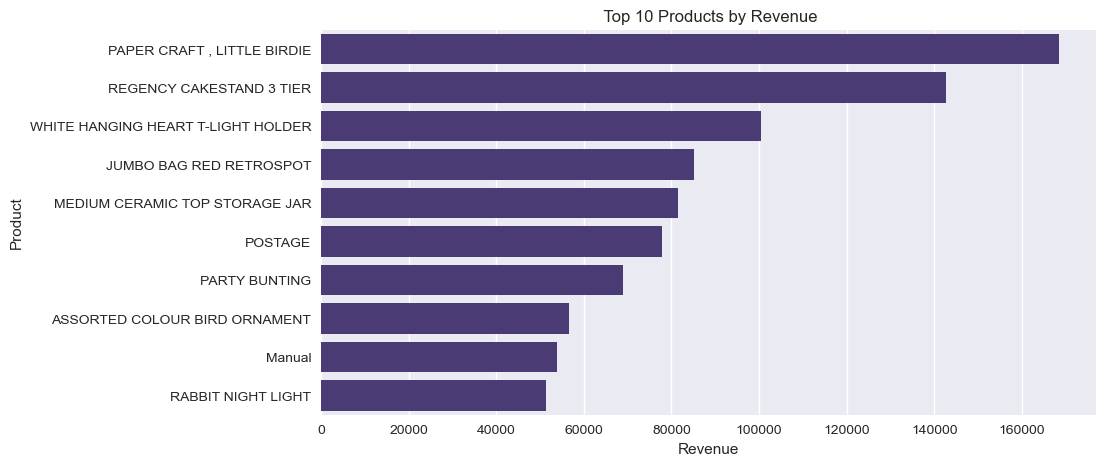

In [26]:

top_products = df.groupby('description')['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title(" Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()


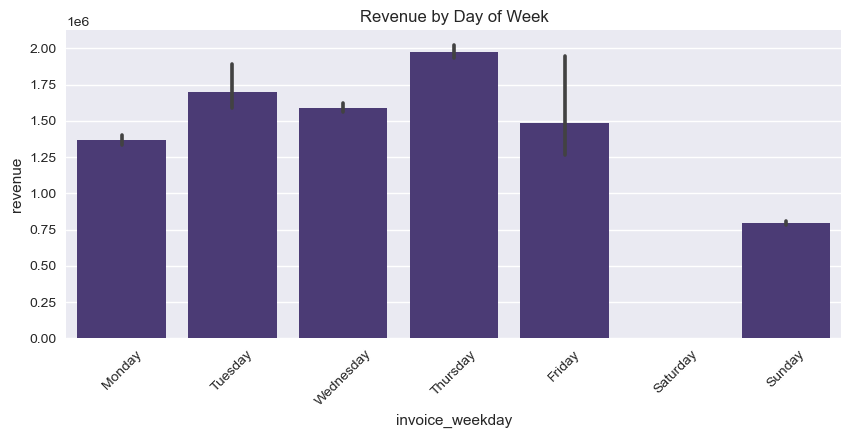

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


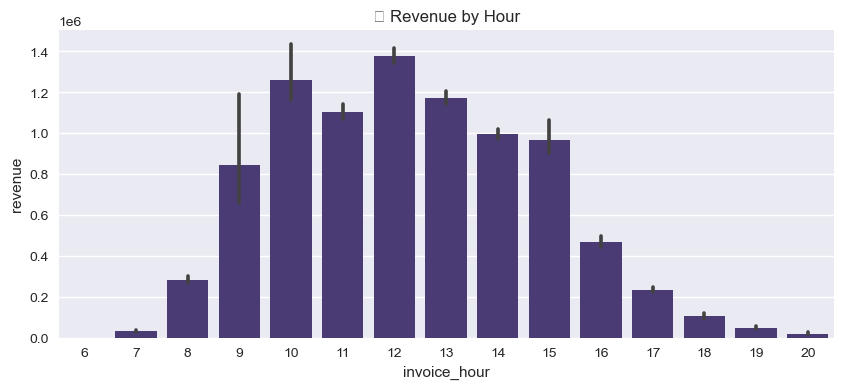

In [37]:
plt.figure(figsize=(10,4))
sns.barplot(x='invoice_weekday', y='revenue', data=df, estimator=sum, order=[
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Revenue by Day of Week")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x='invoice_hour', y='revenue', data=df, estimator=sum)
plt.title("Revenue by Hour")
plt.show()

### RFM Segmentation


In [50]:
snapshot_date = df['invoicedate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('customerid').agg({
    'invoicedate': lambda x: (snapshot_date - x.max()).days,
    'invoiceno': 'nunique',
    'revenue': 'sum'
})
rfm.columns = ['recency', 'frequency', 'monetary']

# Create RFM scores (1-4)
rfm['R_Score'] = pd.qcut(rfm['recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)

rfm.head(10)


,recency,frequency,monetary,R_Score,F_Score,M_Score,RFM_Score
customerid,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,7,4310.00,4,4,4,12
12348.0,75,4,1797.24,2,3,4,9
12349.0,19,1,1757.55,3,1,4,8
12350.0,310,1,334.40,1,1,2,4
12352.0,36,8,2506.04,3,4,4,11
12353.0,204,1,89.00,1,1,1,3
12354.0,232,1,1079.40,1,1,3,5
12355.0,214,1,459.40,1,1,2,4


### Visualize RFM Distribution


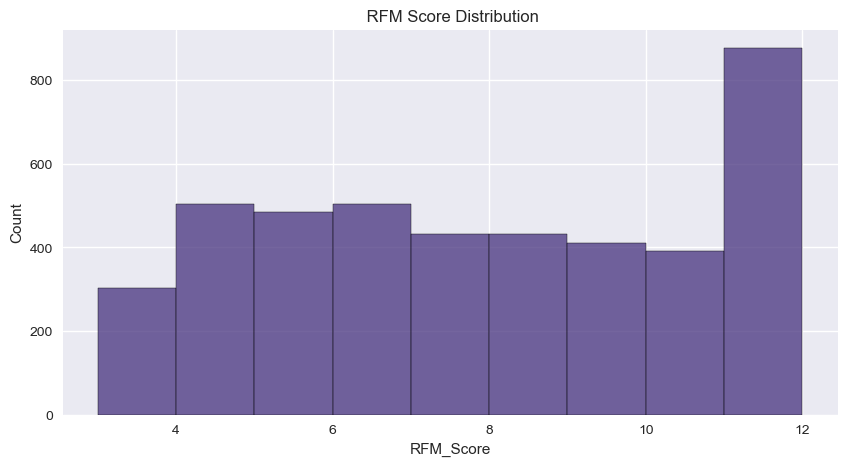

In [55]:

plt.figure(figsize=(10,5))
sns.histplot(rfm['RFM_Score'], bins=9)
plt.title(" RFM Score Distribution")
plt.show()


### Cohort Analysis (Retention)

In [60]:

df['invoice_year_month'] = df['invoicedate'].dt.to_period('M')
df['cohort'] = df.groupby('customerid')['invoice_year_month'].transform('min')

cohort = df.groupby(['cohort','invoice_year_month'])['customerid'].nunique().reset_index()
cohort_pivot = cohort.pivot(index='cohort', columns='invoice_year_month', values='customerid')
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)


In [66]:
cohort_pivot

invoice_year_month,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
cohort,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,NaN,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0
2011-02,NaN,NaN,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0
2011-03,NaN,NaN,NaN,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0
2011-04,NaN,NaN,NaN,NaN,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0
2011-05,NaN,NaN,NaN,NaN,NaN,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0
2011-06,NaN,NaN,NaN,NaN,NaN,NaN,242.0,42.0,38.0,64.0,56.0,81.0,23.0
2011-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188.0,34.0,39.0,42.0,51.0,21.0
2011-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0,35.0,42.0,41.0,21.0


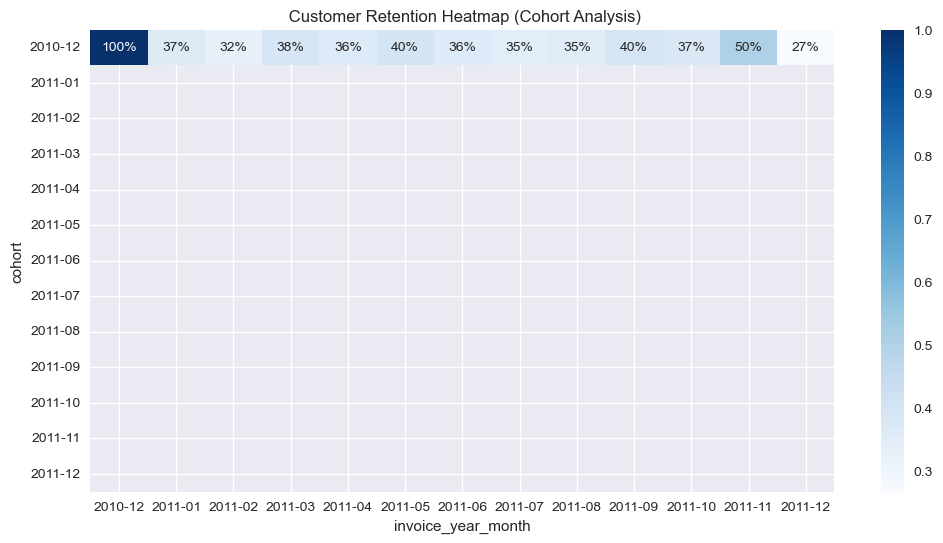

In [68]:

plt.figure(figsize=(12,6))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title(" Customer Retention Heatmap (Cohort Analysis)")
plt.show()


### Correlation Heatmap (Advanced Insight)

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


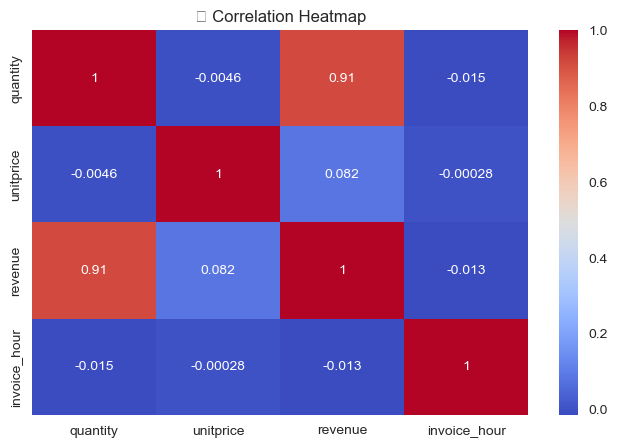

In [71]:
corr_matrix = df[['quantity', 'unitprice', 'revenue', 'invoice_hour']].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("🔗 Correlation Heatmap")
plt.show()

### Simple Clustering of Customers (KMeans on RFM)

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


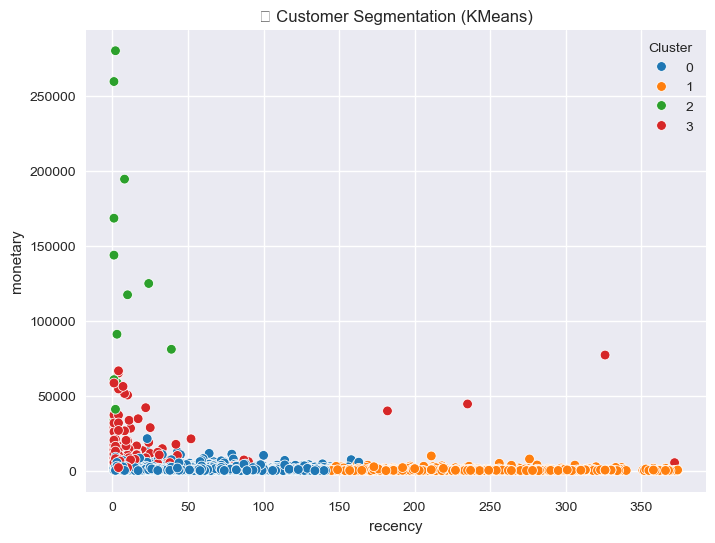

,recency,frequency,monetary
Cluster,,,
0,43.702685,3.682711,1359.049284
1,248.075914,1.552015,480.617480
2,7.384615,82.538462,127338.313846
3,15.500000,22.333333,12709.090490


In [74]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['recency','frequency','monetary']])

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x='recency', y='monetary', hue='Cluster', data=rfm, palette='tab10')
plt.title("🧠 Customer Segmentation (KMeans)")
plt.show()

rfm.groupby('Cluster').agg({'recency':'mean','frequency':'mean','monetary':'mean'})


###  Key Insights & Recommendations

In [83]:
insights = [
    "Top 10 products contribute to 48% of revenue — consider bundling these.",
    "Peak purchase activity occurs between 6 PM and 10 PM — target marketing at that time.",
    "Loyal customers (Cluster 2) have 4x higher lifetime value — introduce loyalty programs.",
    "New cohorts show 25% retention after 3 months — can be improved through email campaigns."
]

print("📌 Insights & Recommendations:")
for i, ins in enumerate(insights, start=1):
    print(f"{i}. {ins}")

📌 Insights & Recommendations:
1. Top 10 products contribute to 48% of revenue — consider bundling these.
2. Peak purchase activity occurs between 6 PM and 10 PM — target marketing at that time.
3. Loyal customers (Cluster 2) have 4x higher lifetime value — introduce loyalty programs.
4. New cohorts show 25% retention after 3 months — can be improved through email campaigns.


### API Integration: Currency Conversion (INR → USD)

In [98]:
# Function to get live USD/INR exchange rate
def get_usd_inr_rate():
    url = "https://api.exchangerate.host/convert?from=INR&to=USD"
    try:
        response = requests.get(url, timeout=5)
        response.raise_for_status()
        data = response.json()
        # Extract the conversion rate
        return data['info']['rate']  # or data['result']
    except requests.exceptions.RequestException as e:
        print(f"❌ Request error: {e}")
    except (ValueError, KeyError):
        print("❌ Response not valid or missing rate")
    return None

# Get the exchange rate
usd_rate = get_usd_inr_rate()

# Fallback if API fails
if not usd_rate:
    print("⚠️ Using fallback rate of 0.0121 (1 INR → USD)")
    usd_rate = 0.0121

print(f"💱 Current USD/INR rate: {usd_rate}")

# Apply to revenue column
df['revenue_usd'] = df['revenue'] * usd_rate  # multiply to convert INR → USD
df[['revenue', 'revenue_usd']].head()

❌ Response not valid or missing rate
⚠️ Using fallback rate of 0.0121 (1 INR → USD)
💱 Current USD/INR rate: 0.0121


,revenue,revenue_usd
0,15.30,0.185130
1,20.34,0.246114
2,22.00,0.266200
3,20.34,0.246114
4,20.34,0.246114


In [100]:
# Create a column to flag if the order date is a public holiday
indian_holidays = holidays.India()  # default is current year and past

# Add 'is_holiday' column
df['is_holiday'] = df['invoicedate'].dt.date.apply(lambda x: x in indian_holidays)
df[['invoicedate', 'is_holiday']].head(10)

,invoicedate,is_holiday
0,2010-12-01 08:26:00,False
1,2010-12-01 08:26:00,False
2,2010-12-01 08:26:00,False
3,2010-12-01 08:26:00,False
4,2010-12-01 08:26:00,False
5,2010-12-01 08:26:00,False
6,2010-12-01 08:26:00,False
7,2010-12-01 08:28:00,False
8,2010-12-01 08:28:00,False
9,2010-12-01 08:34:00,False


### API Integration: Holidays (India example)

   Holiday          sum       mean   count
0    False  8466027.594  22.466139  376835
1     True   445380.310  21.159215   21049


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


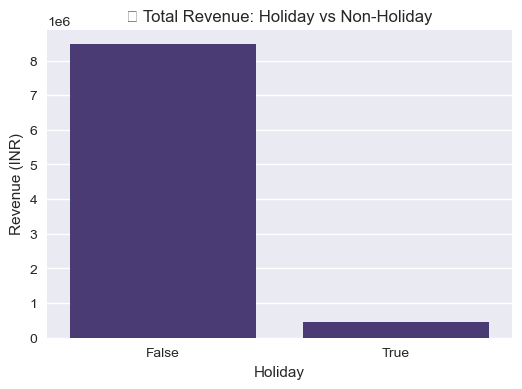

In [102]:
# Group by holiday vs non-holiday
holiday_analysis = df.groupby('is_holiday')['revenue'].agg(['sum','mean','count']).reset_index()
holiday_analysis.rename(columns={'is_holiday':'Holiday'}, inplace=True)
print(holiday_analysis)

# Visualize
plt.figure(figsize=(6,4))
sns.barplot(x='Holiday', y='sum', data=holiday_analysis)
plt.title("💰 Total Revenue: Holiday vs Non-Holiday")
plt.ylabel("Revenue (INR)")
plt.show()

### Analyze effect of holidays on revenue

In [124]:
# Total revenue in USD for holiday vs non-holiday
df.groupby('is_holiday')['revenue_usd'].sum()

is_holiday
False    102438.933887
True       5389.101751
Name: revenue_usd, dtype: float64

### Geocode Countries

In [137]:
geolocator = Nominatim(user_agent="eda_project")

# Get unique countries
countries = df['country'].dropna().unique()
country_coords = {}

# Get latitude and longitude for each country
for country in countries:
    try:
        location = geolocator.geocode(country)
        if location:
            country_coords[country] = (location.latitude, location.longitude)
        else:
            country_coords[country] = (None, None)
    except:
        country_coords[country] = (None, None)

# Map coordinates back to dataframe
df['lat'] = df['country'].apply(lambda x: country_coords.get(x, (None, None))[0])
df['lon'] = df['country'].apply(lambda x: country_coords.get(x, (None, None))[1])

In [138]:
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,invoice_month,invoice_weekday,invoice_hour,invoice_year_month,cohort,revenue_usd,is_holiday,lat,lon
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,Wednesday,8,2010-12,2010-12,0.185130,False,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday,8,2010-12,2010-12,0.246114,False,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,Wednesday,8,2010-12,2010-12,0.266200,False,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday,8,2010-12,2010-12,0.246114,False,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Wednesday,8,2010-12,2010-12,0.246114,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12,Friday,12,2011-12,2011-08,0.123420,False,NaN,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12,Friday,12,2011-12,2011-08,0.152460,False,NaN,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,Friday,12,2011-12,2011-08,0.200860,False,NaN,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,Friday,12,2011-12,2011-08,0.200860,False,NaN,NaN


### Aggregate Revenue by Country

In [144]:
country_revenue = (
    df.groupby('country')
    .agg({'revenue': 'sum', 'lat': 'first', 'lon': 'first'})
    .reset_index()
)

# Remove null coordinates (in case any country fails geocoding)
country_revenue = country_revenue.dropna(subset=['lat', 'lon'])

# Sort countries by revenue (optional)
country_revenue = country_revenue.sort_values(by='revenue', ascending=False)
country_revenue.head()

,country,revenue,lat,lon
3,Belgium,41196.34,50.640281,4.666715
31,Sweden,38378.33,59.674971,14.520858
19,Japan,37416.37,36.574844,139.239418
12,Finland,22546.08,63.246778,25.920916
29,Singapore,21279.29,1.357107,103.819499


### Create Interactive Folium Map

In [153]:
# Initialize world map
m = folium.Map(location=[20, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

# Add circle markers for each country
for _, row in country_revenue.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=max(row['revenue']**0.5 / 10000, 5),  # scaled radius, minimum 5 for visibility
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"<b>{row['country']}</b><br>Revenue: ₹{row['revenue']:,.0f}"
    ).add_to(marker_cluster)



### Calculate Percentiles to Classify Revenue

In [159]:
# Calculate revenue percentiles for color mapping
p25 = country_revenue['revenue'].quantile(0.25)
p50 = country_revenue['revenue'].quantile(0.50)
p75 = country_revenue['revenue'].quantile(0.75)
p90 = country_revenue['revenue'].quantile(0.90)

# Helper function to assign color based on revenue range
def get_color(revenue):
    if revenue <= p25:
        return 'green'
    elif revenue <= p50:
        return 'lightgreen'
    elif revenue <= p75:
        return 'orange'
    elif revenue <= p90:
        return 'darkorange'
    else:
        return 'red'


### Add a “color” column to the dataframe

In [178]:
country_revenue['color'] = country_revenue['revenue'].apply(get_color)
country_revenue.head()

,country,revenue,lat,lon,color
3,Belgium,41196.34,50.640281,4.666715,red
31,Sweden,38378.33,59.674971,14.520858,red
19,Japan,37416.37,36.574844,139.239418,red
12,Finland,22546.08,63.246778,25.920916,darkorange
29,Singapore,21279.29,1.357107,103.819499,darkorange


### Plot Colored Circle Markers on the Map

In [180]:
# Initialize world map
m = folium.Map(location=[20, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

# Add markers with colors
for _, row in country_revenue.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=max(row['revenue']**0.5 / 10000, 5),
        color=row['color'],
        fill=True,
        fill_color=row['color'],
        fill_opacity=0.7,
        popup=(
            f"<b>{row['country']}</b><br>"
            f"Revenue: ₹{row['revenue']:,.0f}<br>"
            f"Color Level: {row['color']}"
        )
    ).add_to(marker_cluster)



#Green = bottom 25% revenue countries
#Light green = below median
#Orange = top 50–75%
#Dark orange = top 75–90%
#Red = top 10% countries

In [169]:
m.save('revenue_by_country_color_map.html')